In [9]:
# Step 1
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import helpers.activity_1001_helper as helper
stocks_data = pd.read_csv('../data/stocks.csv')

In [10]:
# Step 2
stocks_data.dtypes
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
stocks_data.Date.describe()

count                              753
mean     2017-10-13 07:50:26.294820608
min                2017-04-17 00:00:00
25%                2017-07-14 00:00:00
50%                2017-10-12 00:00:00
75%                2018-01-12 00:00:00
max                2018-04-13 00:00:00
Name: Date, dtype: object

count                              753
mean     2017-10-13 07:50:26.294820608
min                2017-04-17 00:00:00
25%                2017-07-14 00:00:00
50%                2017-10-12 00:00:00
75%                2018-01-12 00:00:00
max                2018-04-13 00:00:00
Name: Date, dtype: object

In [11]:
# Step 3
# Getting the max date
max_date = stocks_data.Date.max()
# Getting the limit date 3 months back
date_lim = max_date + pd.DateOffset(months=-3)
# Defining the symbols as a list
symbols = stocks_data.symbol.unique()

# Creating basic vars for the data
train = stocks_data.loc[stocks_data.Date <= date_lim, :]
test = stocks_data.loc[stocks_data.Date > date_lim, :]


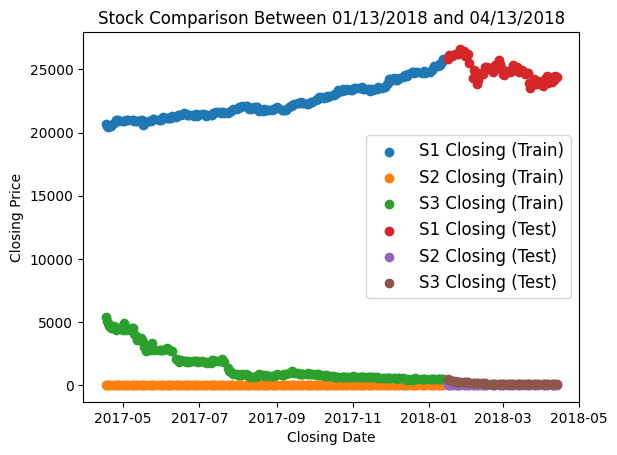

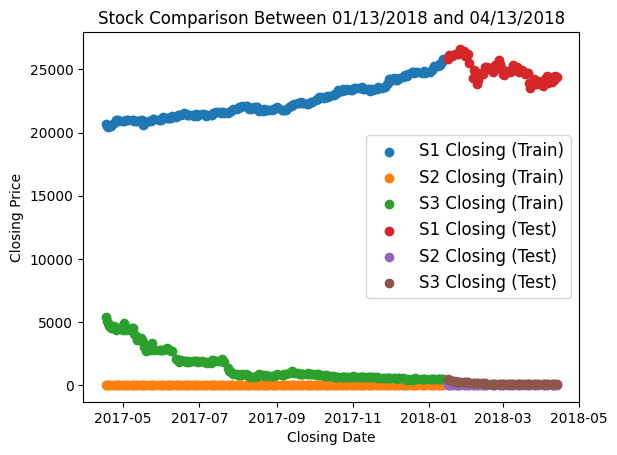

In [12]:
# Step 4
subplots = plt.subplots()
ax = subplots[1];

helper.scatter(ax=ax, grouped_results=train.groupby('symbol'), type='Train')
helper.scatter(ax=ax, grouped_results=test.groupby('symbol'), type='Test')
ax.set_title(f'Stock Comparison Between {date_lim.strftime("%m/%d/%Y")} and {max_date.strftime("%m/%d/%Y")}')
ax.set_ylabel('Closing Price')
ax.set_xlabel('Closing Date')
ax.legend(fontsize = 12)

plt.show()


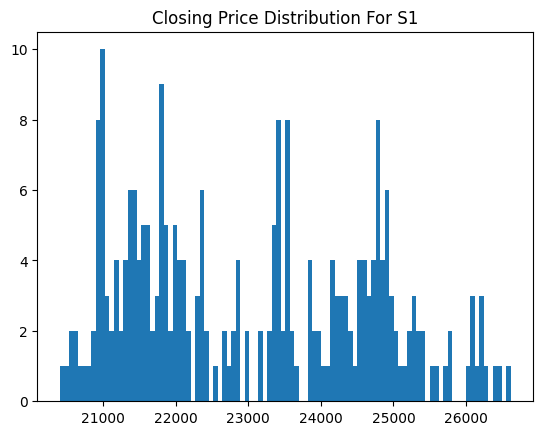

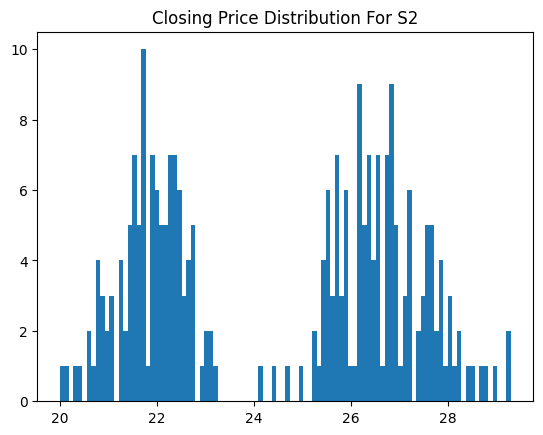

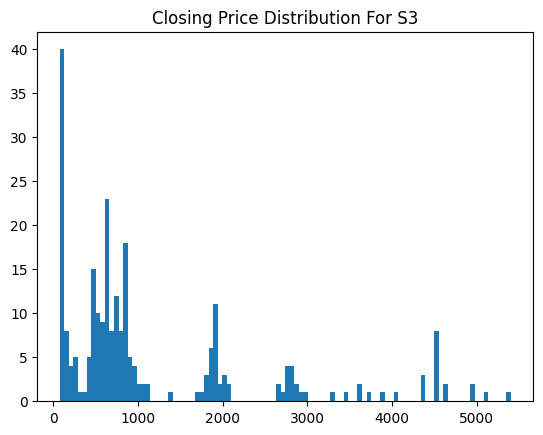

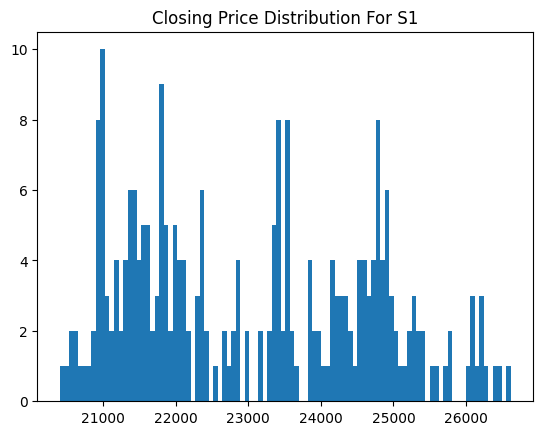

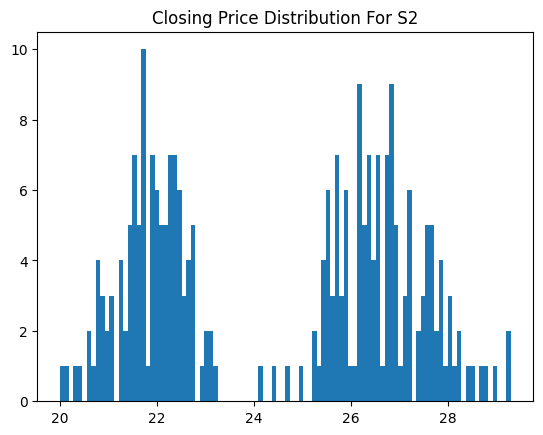

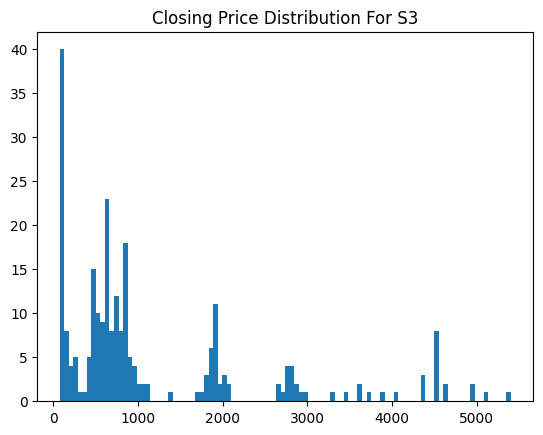

In [13]:
# Step 5

# Looping through each symbol and grouping to get the distributions
for symbol in symbols:
    symbol_subplots = plt.subplots()
    symbol_ax = symbol_subplots[1]
    symbol_ax.hist(stocks_data.groupby('symbol').get_group(symbol)['Close'], bins=100)
    symbol_ax.set_title(f'Closing Price Distribution For {symbol}')
    plt.show()

In [14]:
# Step 6
scale_cols = ['Close', 'Volume']
scaled_data_list = []

# Looping through each symbol and scaling the data
for symbol in symbols:
    scaler = StandardScaler()
    symbol_data = stocks_data.groupby('symbol').get_group(symbol).copy()
    slice = symbol_data.loc[:, scale_cols]
    symbol_data.loc[:, scale_cols] = (scaler.fit_transform(slice))
    scaled_data_list.append(symbol_data)

[data.head() for data in scaled_data_list]

[         Date     Close    Volume symbol sentiment
 0  2017-04-17 -1.469506 -1.175399     S1   NEUTRAL
 3  2017-04-18 -1.538998 -0.840327     S1   NEUTRAL
 6  2017-04-19 -1.611638 -0.528257     S1   NEUTRAL
 9  2017-04-20 -1.505101 -0.354008     S1       POS
 14 2017-04-21 -1.524028  0.210303     S1   NEUTRAL,
          Date     Close    Volume symbol sentiment
 1  2017-04-17 -1.757829  0.198494     S2   NEUTRAL
 4  2017-04-18 -1.699092 -0.359611     S2   NEUTRAL
 7  2017-04-19 -1.640355  0.351069     S2   NEUTRAL
 10 2017-04-20 -1.424984 -0.443929     S2       POS
 12 2017-04-21 -1.483721 -0.259233     S2   NEUTRAL,
          Date     Close    Volume symbol sentiment
 2  2017-04-17  3.342186 -0.211226     S3   NEUTRAL
 5  2017-04-18  3.104449 -0.211226     S3   NEUTRAL
 8  2017-04-19  2.985580 -0.211226     S3   NEUTRAL
 11 2017-04-20  2.747843 -0.211226     S3       NEG
 13 2017-04-21  2.628974 -0.211226     S3   NEUTRAL]

[         Date     Close    Volume symbol sentiment
 0  2017-04-17 -1.469506 -1.175399     S1   NEUTRAL
 3  2017-04-18 -1.538998 -0.840327     S1   NEUTRAL
 6  2017-04-19 -1.611638 -0.528257     S1   NEUTRAL
 9  2017-04-20 -1.505101 -0.354008     S1       POS
 14 2017-04-21 -1.524028  0.210303     S1   NEUTRAL,
          Date     Close    Volume symbol sentiment
 1  2017-04-17 -1.757829  0.198494     S2   NEUTRAL
 4  2017-04-18 -1.699092 -0.359611     S2   NEUTRAL
 7  2017-04-19 -1.640355  0.351069     S2   NEUTRAL
 10 2017-04-20 -1.424984 -0.443929     S2       POS
 12 2017-04-21 -1.483721 -0.259233     S2   NEUTRAL,
          Date     Close    Volume symbol sentiment
 2  2017-04-17  3.342186 -0.211226     S3   NEUTRAL
 5  2017-04-18  3.104449 -0.211226     S3   NEUTRAL
 8  2017-04-19  2.985580 -0.211226     S3   NEUTRAL
 11 2017-04-20  2.747843 -0.211226     S3       NEG
 13 2017-04-21  2.628974 -0.211226     S3   NEUTRAL]

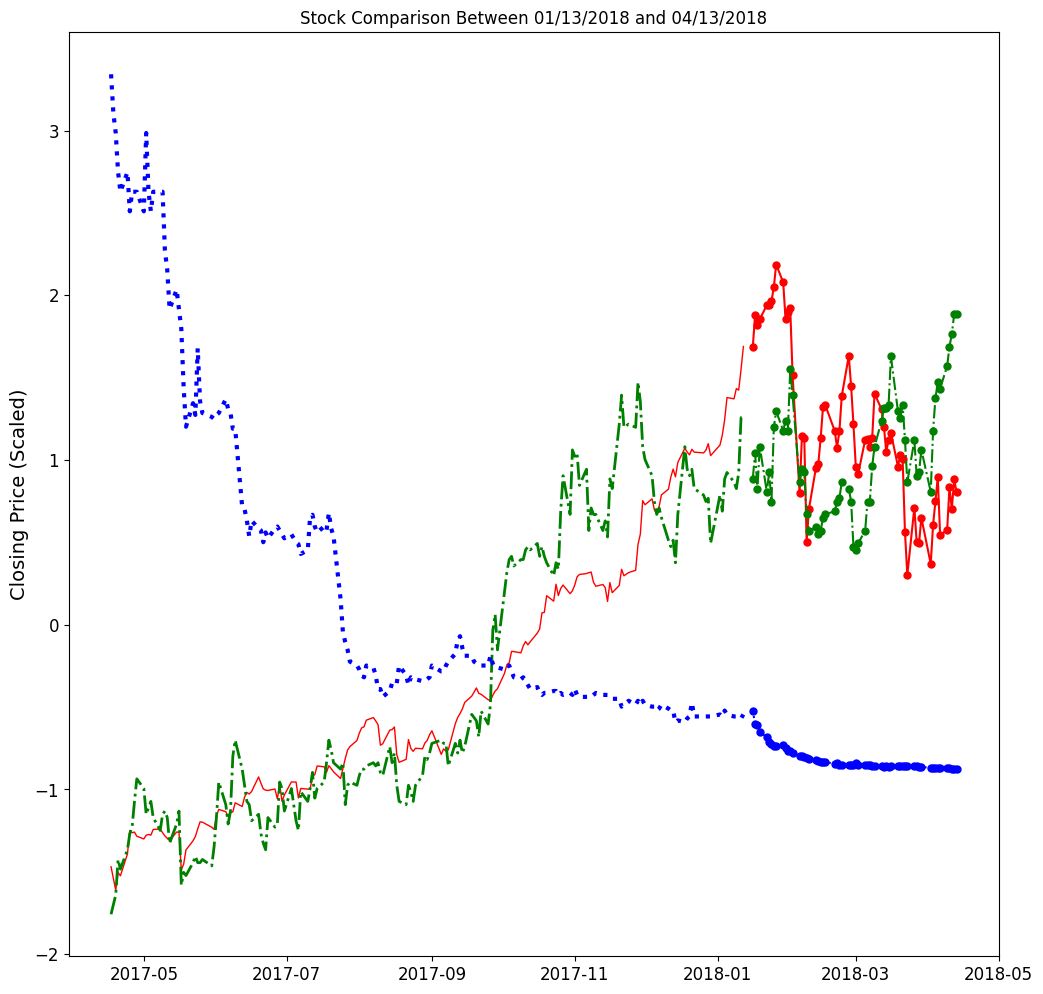

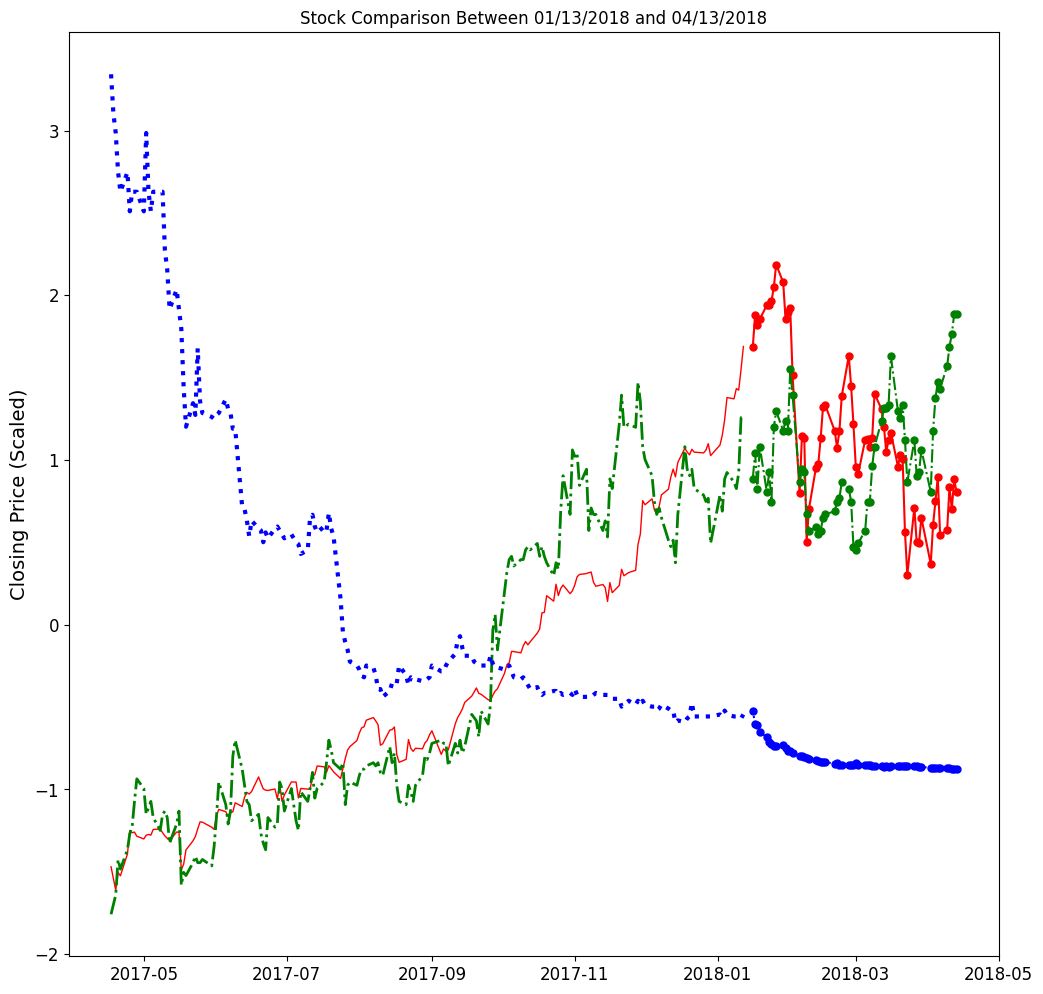

In [15]:
# Step 7
colors = ['red', 'green', 'blue']
styles = ['solid', 'dashdot', 'dotted']

symbol_compare_subplot = plt.subplots(figsize=(12,12))
symbol_compare_ax = symbol_compare_subplot[1]

# Looping through each stock and plotting them
for i in range(len(symbols)):
    scaled_data = scaled_data_list[i]
    helper.plot_compare(ax=symbol_compare_ax, data=scaled_data.loc[scaled_data['Date'] <= date_lim, :], color=colors[i], style=styles[i],type='train', lw=i+1)
    helper.plot_compare(ax=symbol_compare_ax, data=scaled_data.loc[scaled_data['Date'] > date_lim, :], color=colors[i], style=styles[i],type='test', markersize=5, marker='o')

symbol_compare_ax.set_ylabel('Closing Price (Scaled)', fontsize = 14)
symbol_compare_ax.tick_params(labelsize = 12)
symbol_compare_ax.set_title(f'Stock Comparison Between {date_lim.strftime("%m/%d/%Y")} and {max_date.strftime("%m/%d/%Y")}')

plt.show()

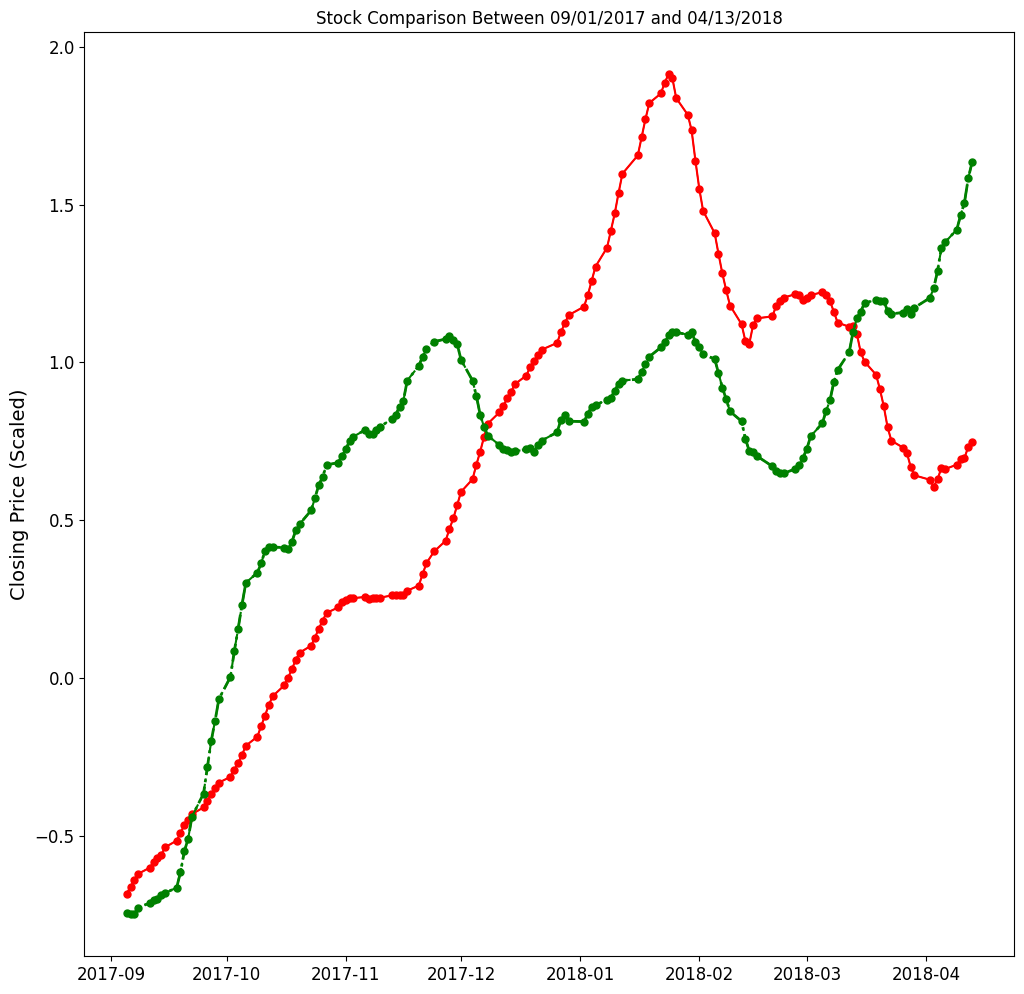

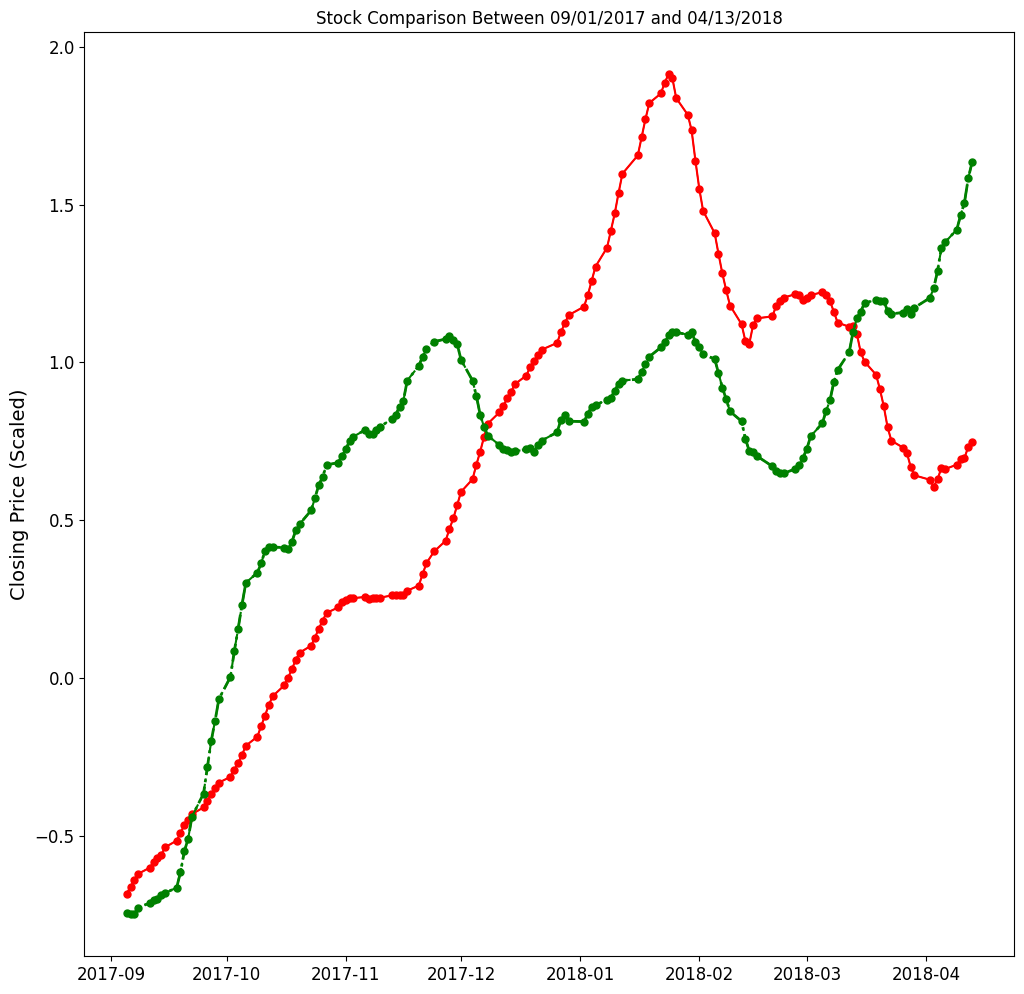

In [16]:
# Step 8
date_lim_start = '2017-09-01'

symbol_compare_subplot = plt.subplots(figsize=(12,12))
symbol_compare_ax = symbol_compare_subplot[1]

# Looping through the first 2 symbols and adjusting the dates and re-scaling
for i in range(len(symbols)-1):
    scaled_data = scaled_data_list[i].copy()
    train = scaled_data.loc[scaled_data['Date'] <= date_lim, :]
    train = scaled_data.loc[scaled_data['Date'] > date_lim_start, :]
    train.Close = train.Close.rolling(window=14, min_periods=0, center=True).mean()

    helper.plot_compare(ax=symbol_compare_ax, data=train, color=colors[i], style=styles[i],type='train', lw=i+1)

    test = scaled_data.loc[scaled_data['Date'] > date_lim, :]
    test = scaled_data.loc[scaled_data['Date'] > date_lim_start, :]
    test.Close = test.Close.rolling(window=14, min_periods=0, center=True).mean()
    helper.plot_compare(ax=symbol_compare_ax, data=test, color=colors[i], style=styles[i],type='test', markersize=5, marker='o')

symbol_compare_ax.set_ylabel('Closing Price (Scaled)', fontsize = 14)
symbol_compare_ax.tick_params(labelsize = 12)
symbol_compare_ax.set_title(f'Stock Comparison Between {pd.to_datetime(date_lim_start).strftime("%m/%d/%Y")} and {max_date.strftime("%m/%d/%Y")}')

plt.show()